# Dimensionality Reduction

## Principal Component Analysis (PCA)

#### Singular Value Decomposition (SVD)
$X = U\sum V^{T}\newline$
V contains all the principal components

#### Principal Components matrix
$V = \begin{pmatrix}
| & | & & |\\
c_1 & c_2 & ... & c_2\\
| & | & & |
\end{pmatrix}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(0, 101)
y = []
for elem in x:
    y.append(2*elem + 50*np.random.rand())

y = np.array(y)
X = np.array([x, y])

In [3]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

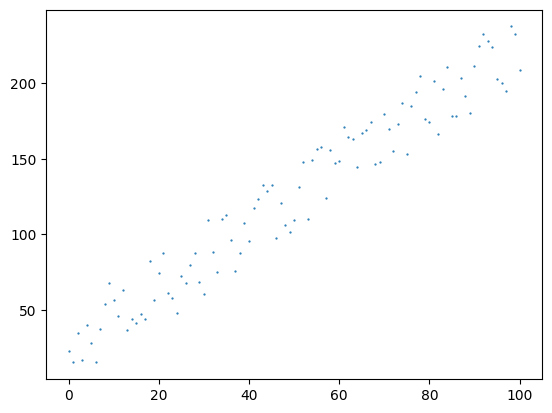

In [4]:
plt.scatter(x, y, s=1.4, marker='.')

In [5]:
print(c1)

[0.02743998 0.01731831 0.03930302 0.01654531 0.04339092 0.02794426
 0.01091614 0.03610841 0.05516992 0.07090563 0.05618088 0.04159978
 0.06133946 0.02802467 0.03621718 0.03118953 0.03716259 0.03205873
 0.07732762 0.0454699  0.06538578 0.0798121  0.04725859 0.04201537
 0.02906985 0.05697006 0.0503417  0.06365071 0.07214065 0.0473394
 0.03672909 0.09409374 0.06738824 0.05067815 0.09192393 0.09327355
 0.07245686 0.04625133 0.05944553 0.08244162 0.06668623 0.09225774
 0.09781475 0.10819257 0.10225614 0.10590002 0.06198044 0.08890726
 0.06998103 0.06314748 0.07191013 0.09642896 0.115452   0.06874614
 0.11499626 0.12218087 0.12248742 0.08067911 0.11817224 0.10613916
 0.10663155 0.13258323 0.12300383 0.1206327  0.09704422 0.12255891
 0.1242555  0.12947964 0.09482782 0.09492914 0.13215597 0.11907073
 0.09980414 0.12048735 0.13588053 0.09378584 0.13093723 0.1415705
 0.15241129 0.11761324 0.11372424 0.14541841 0.10147559 0.13598928
 0.15256648 0.11216699 0.11084516 0.14015618 0.12488195 0.109881

#### Projecting Down to d Dimensions
$X_{d-proj} = XW_d$

In [6]:
W1 = Vt.T[:, :2]
X1D = X_centered.dot(W1)

In [7]:
print(X1D)

[[-4.15441468e+02  4.61767702e-14]
 [ 4.15441468e+02  4.66666464e-15]]


In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [9]:
pca.explained_variance_ratio_

array([1.00000000e+00, 3.43909334e-32])

### Chosing the Right Number of Dimensions

In [10]:
from sklearn.datasets import load_digits

mnist = load_digits()

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist['data'], mnist['target'], test_size=0.25)

In [12]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [13]:
print(d)

28


In [14]:
pca = PCA(n_components=29)
pca.fit(X_train)

PCA(n_components=29)

In [15]:
pca.explained_variance_ratio_

array([0.1471309 , 0.13579056, 0.11716731, 0.08240232, 0.06025005,
       0.04817319, 0.04507598, 0.03699979, 0.03373559, 0.03123493,
       0.02375215, 0.02291488, 0.01848695, 0.01780088, 0.01502502,
       0.01422981, 0.01268302, 0.01244511, 0.01027083, 0.00918419,
       0.00876366, 0.00791095, 0.00758564, 0.00751155, 0.00706756,
       0.00610587, 0.00577733, 0.00515106, 0.00479358])

In [16]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [17]:
pca.explained_variance_ratio_

array([0.1471309 , 0.13579056, 0.11716731, 0.08240232, 0.06025005,
       0.04817319, 0.04507598, 0.03699979, 0.03373559, 0.03123493,
       0.02375215, 0.02291488, 0.01848695, 0.01780088, 0.01502502,
       0.01422981, 0.01268302, 0.01244511, 0.01027084, 0.00918419,
       0.00876366, 0.00791095, 0.00758566, 0.00751159, 0.00706762,
       0.00610588, 0.00577735, 0.00515115])

In [18]:
print(mnist.data.shape[1])

64


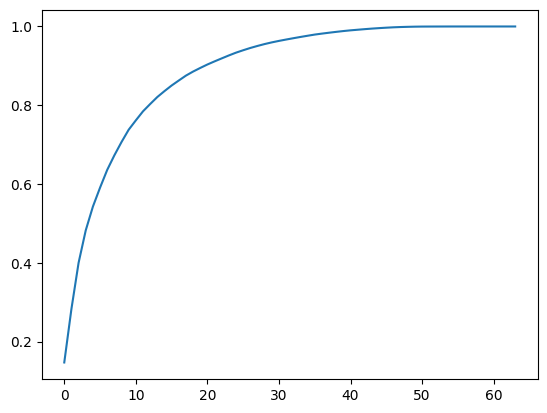

In [19]:
plt.plot(np.arange(mnist.data.shape[1]), cumsum)

### PCA for Compression

In [20]:
X_reduced.shape

(1347, 28)

#### PCA inverse transformation, back to the original number of dimensions
$X_{recovered} = X_{d-proj}W_d^{T}$

In [21]:
X_recovered = pca.inverse_transform(X_reduced)

In [22]:
from sklearn.metrics import mean_squared_error 

print(mean_squared_error(X_train, X_recovered))

0.9231435043544146


### Randomized PCA

In [23]:
rnd_pca = PCA(n_components=29, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)

### Incremental PCA (IPCA)

In [24]:
print(X_train.shape)

(1347, 64)


In [25]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=13)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

### Kernel PCA

In [26]:
from sklearn.datasets import make_swiss_roll

swiss_data = make_swiss_roll()

In [27]:
X_data = swiss_data[0]
y_data = swiss_data[1]

In [28]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_reduced = rbf_pca.fit_transform(X_data)

In [29]:
X_reduced.shape

(100, 2)

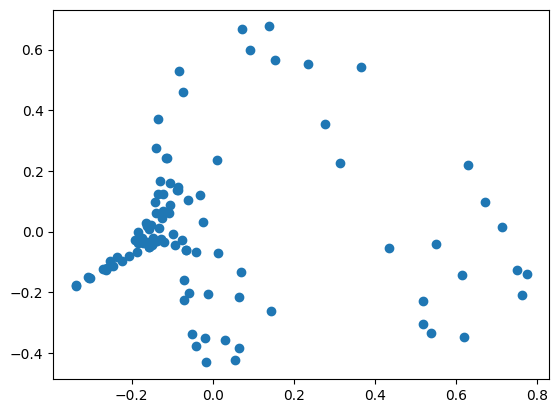

In [30]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])

### Selecting a Kernel and Tuning Hyperparameters

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [32]:
clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LinearRegression()),
])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"],
}]

grid_search = GridSearchCV(clf, param_grid, cv=3, error_score='raise')
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LinearRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [33]:
print(grid_search.best_params_)

{'kpca__gamma': 0.05, 'kpca__kernel': 'rbf'}


In [34]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0433,
                   fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X_data)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [35]:
mean_squared_error(X_data, X_preimage)

36.362605489387015

## Locally Linear Embedding (LLE)

In [36]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X_data)

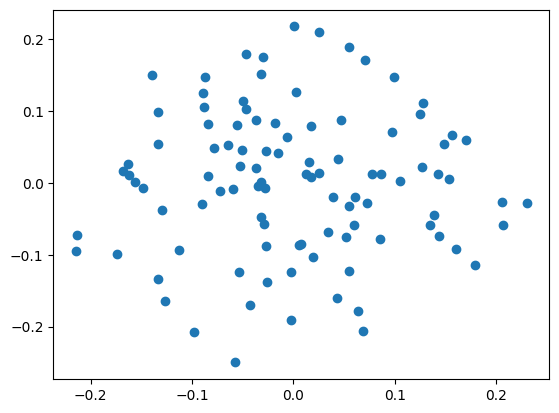

In [37]:
plt.scatter(X_reduced[:,0], X_reduced[:,1])

#### Step 1: Linearly modeling local relationships
$\widehat{W} = argmin_{W}~\sum _{i=1}^{m} \left(x^{(i)} - \sum_{j=1}^{m} w_{i,j}x^{(j)}\right)^{2}\newline$
Subject to: $\begin{cases} w_{i,j} = 0, & \mbox{if } x^{(j)}\mbox{ is not one of the } k \mbox{ c.n of} x^{(i)}\\ \sum_{j=1}^{m}w_{i,j}=1, & \mbox{for } i = 1,2,...,m \end{cases}$

#### Step 2: Reducing dimensionality while preserving relationships
$\widehat{Z} = argmin_{Z} \sum_{i=1}^{m}\left(z^{(i)} - \sum_{j=1}^{m}\hat{w}_{i,j}z^{(j)}\right)^{2}$

## Exercises

### Question 1:

Reducing the dataset's dimensionality can improve significantly the time processing in the learning algorithm, which is a important aspect when considering the capabilities of your hardware. On the on the hand, this leads to lose of information, so it should be done carefully.

### Question 2:

It is really common in Machine Learning problems to come up with a very large number of features for each traning instance. This can makes training extremely slow, and it also makes it much harder to find a good solution. To this we called the curse of dimensionality.

### Question 3:

Not totaly (due to the lost information), but some algorithms allow you to reverse the transformation getting closer to how it was before by decompressing the transformed data into the dimensional size it had before.

### Question 4:

This can be done by using the variety of PCA called KernelPCA (kPCA), which uses the same kernel tricky saw in Support Vector Machines, a mathematical technique that implicitly maps instances into a very high-dimensional space (the feature space)

### Question 5:

The resulting dimensionality for $95\%$ explained variance ratio depends on the dataset not in it n-dimensional value. The number of resulting dimensions will be the smaller that preserves that explained variance ration. 

### Question 6:

Vanilla PCA - When dealing with not to large datasets with linear relationship.$\newline$
Incremental PCA - When using a very large dataset, since it splits the data into mini-batches and apply PCA for each one.$\newline$
Randomized PCA - When d (the number of desired dimension) is much smaller than n (the number of instances).$\newline$
Kernel PCA - When dealing with a complex nonlinear dataset.

### Question 7:

This is possible by computing the mean_squared distance between the original and the transformed data.

### Question 8:

Not much, it seems that chaining different dimensionality reduction algorithms can lead to more loss of information, and turn it even harder to reverse.

### Question 9:

In [38]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

In [39]:
X, y = mnist["data"], mnist["target"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7)

In [41]:
from sklearn.ensemble import RandomForestClassifier
import time

rnd_clf = RandomForestClassifier()
start = time.time()
rnd_clf.fit(X_train, y_train)
end = time.time()

In [42]:
print(f"time to train:{end-start}")
print(f"score on test set:{rnd_clf.score(X_test, y_test)}")

time to train:29.211852073669434
score on test set:0.9717


In [47]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=1/7)

In [48]:
start = time.time()
rnd_clf.fit(X_train, y_train)
end = time.time()

In [49]:
print(f"time to train:{end-start}")
print(f"score on test set:{rnd_clf.score(X_test, y_test)}")

time to train:74.64893174171448
score on test set:0.9518


The training was actually faster than before, and the accuracy score was almost the same. I don't know why.

### Question 10

In [50]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

/home/emanueloliveira/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/emanueloliveira/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [54]:
print(X_tsne.shape)

(70000, 2)


In [73]:
digit0 = []
digit1 = []
digit2 = []
digit3 = []
digit4 = []
digit5 = []
digit6 = []
digit7 = []
digit8 = []
digit9 = []
for i in range(y.shape[0]):
    if y[i] == '0':
        digit0.append(X_tsne[i])
    if y[i] == '1':
        digit1.append(X_tsne[i])
    if y[i] == '2':
        digit2.append(X_tsne[i])
    if y[i] == '3':
        digit3.append(X_tsne[i])
    if y[i] == '4':
        digit4.append(X_tsne[i])
    if y[i] == '5':
        digit5.append(X_tsne[i])
    if y[i] == '6':
        digit6.append(X_tsne[i])
    if y[i] == '7':
        digit7.append(X_tsne[i])
    if y[i] == '8':
        digit8.append(X_tsne[i])
    if y[i] == '9':
        digit9.append(X_tsne[i])

In [75]:
digit0 = np.array(digit0)
digit1 = np.array(digit1)
digit2 = np.array(digit2)
digit3 = np.array(digit3)
digit4 = np.array(digit4)
digit5 = np.array(digit5)
digit6 = np.array(digit6)
digit7 = np.array(digit7)
digit8 = np.array(digit8)
digit9 = np.array(digit9)

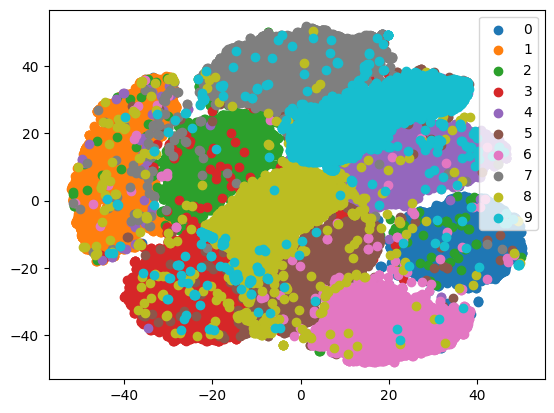

In [80]:
plt.scatter(digit0[:,0], digit0[:,1], label='0')
plt.scatter(digit1[:,0], digit1[:,1], label='1')
plt.scatter(digit2[:,0], digit2[:,1], label='2')
plt.scatter(digit3[:,0], digit3[:,1], label='3')
plt.scatter(digit4[:,0], digit4[:,1], label='4')
plt.scatter(digit5[:,0], digit5[:,1], label='5')
plt.scatter(digit6[:,0], digit6[:,1], label='6')
plt.scatter(digit7[:,0], digit7[:,1], label='7')
plt.scatter(digit8[:,0], digit8[:,1], label='8')
plt.scatter(digit9[:,0], digit9[:,1], label='9')
plt.legend()
plt.show()